##Importando bibliotecas

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

##Carregando Base
 - esta base contem o nome e categorias de filmes 
 - vamos usar o Kmeans para realizar o agrupamento entre os grupos semalhantes
 - a ideia de uma maquina de aprendizado não supervisionada é ela encontrar uma resposta para o problema, diferente do que fizemos anteriormente onde ja tinhas a resposta e treinamos a maquina para classificar

In [2]:
uri  = "https://raw.githubusercontent.com/RafaelBernardo18/aprendizado-de-maquina/main/movies.csv"

base = pd.read_csv(uri)

base.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


##Preprocessamento

In [3]:
#utilizando o metodo get_dummies para extrair em diversas colunas os generos de filmes
tipos = base.genres.str.get_dummies()
nova_base = pd.concat([base, tipos], axis = 1)

nova_base.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
#pre processamento usando StandardScaler
scaler = StandardScaler()

tipos_escalados = scaler.fit_transform(tipos)

tipos_escalados

array([[-0.25291028, -0.37964454,  3.55067626, ..., -0.41592697,
        -0.18669242, -0.15145543],
       [-0.25291028, -0.37964454,  3.55067626, ..., -0.41592697,
        -0.18669242, -0.15145543],
       [-0.25291028, -0.37964454, -0.28163649, ..., -0.41592697,
        -0.18669242, -0.15145543],
       ...,
       [-0.25291028,  2.63404287, -0.28163649, ...,  2.40426826,
        -0.18669242, -0.15145543],
       [ 3.95397138, -0.37964454, -0.28163649, ..., -0.41592697,
        -0.18669242, -0.15145543],
       [ 3.95397138, -0.37964454, -0.28163649, ..., -0.41592697,
        -0.18669242, -0.15145543]])

##Treinando o modelo

In [5]:
modelo = KMeans(n_clusters=15) #esse parametro é referente a quantidade de grupos deseja criar
modelo.fit(tipos_escalados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=15, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
#visializando em qual grupo ele calssificou cada filme 
labels = modelo.labels_

#visualizando o gurpo de  alguns elementos
print(labels[10])
print(labels[66])
print(labels[300])

2
1
4


In [7]:
#visualizando centroides
#possição vetorial em que os centrois se encontram 
modelo.cluster_centers_ 

array([[-2.52910278e-01, -3.63824662e-01, -2.22290965e-01,
        -2.10323309e-01, -2.01363576e-01, -5.28476736e-01,
        -2.76984742e-01,  3.18143724e+00, -7.78919688e-01,
        -2.25161938e-01, -8.89665397e-02, -3.10951738e-01,
        -6.56949143e-02, -1.55255244e-01, -2.28458033e-01,
        -3.76684023e-01, -2.57323652e-01, -4.04823835e-01,
        -1.86692421e-01, -1.51455433e-01],
       [-2.52910278e-01, -8.79565000e-02, -1.31941330e-02,
        -2.10323309e-01, -2.17327301e-02, -6.29211852e-01,
        -3.19532727e-01, -3.14323346e-01,  7.67326635e-01,
        -2.25161938e-01, -8.89665397e-02,  3.55563847e-02,
        -6.56949143e-02, -1.55255244e-01, -2.28458033e-01,
         1.21741612e-01, -2.57323652e-01, -4.15926966e-01,
        -1.86692421e-01, -1.51455433e-01],
       [-2.52910278e-01, -2.18957227e-01, -1.51789675e-01,
        -2.10323309e-01, -3.94737562e-02,  1.58928983e+00,
        -3.19532727e-01, -3.14323346e-01, -2.47577366e-01,
        -2.25161938e-01, -8.8

##Visualizações

In [8]:
#tranformando os centroides em um DataFrame para melhor visualização
grupos = pd.DataFrame(modelo.cluster_centers_, columns = tipos.columns)

grupos.head().T

,0,1,2,3,4
(no genres listed),-0.252910,-0.252910,-0.252910,-0.252910,-0.252910
Action,-0.363825,-0.087957,-0.218957,0.380217,0.272682
Adventure,-0.222291,-0.013194,-0.151790,-0.068730,0.213824
Animation,-0.210323,-0.210323,-0.210323,-0.210323,-0.166558
Children,-0.201364,-0.021733,-0.039474,-0.214951,-0.149950
Comedy,-0.528477,-0.629212,1.589290,-0.487677,-0.255478
Crime,-0.276985,-0.319533,-0.319533,-0.319533,-0.194541
Documentary,3.181437,-0.314323,-0.314323,-0.310055,-0.297204
Drama,-0.778920,0.767327,-0.247577,-0.088959,-0.425323
Fantasy,-0.225162,-0.225162,-0.225162,-0.225162,-0.188598


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcca1c05588>,
      dtype=object)

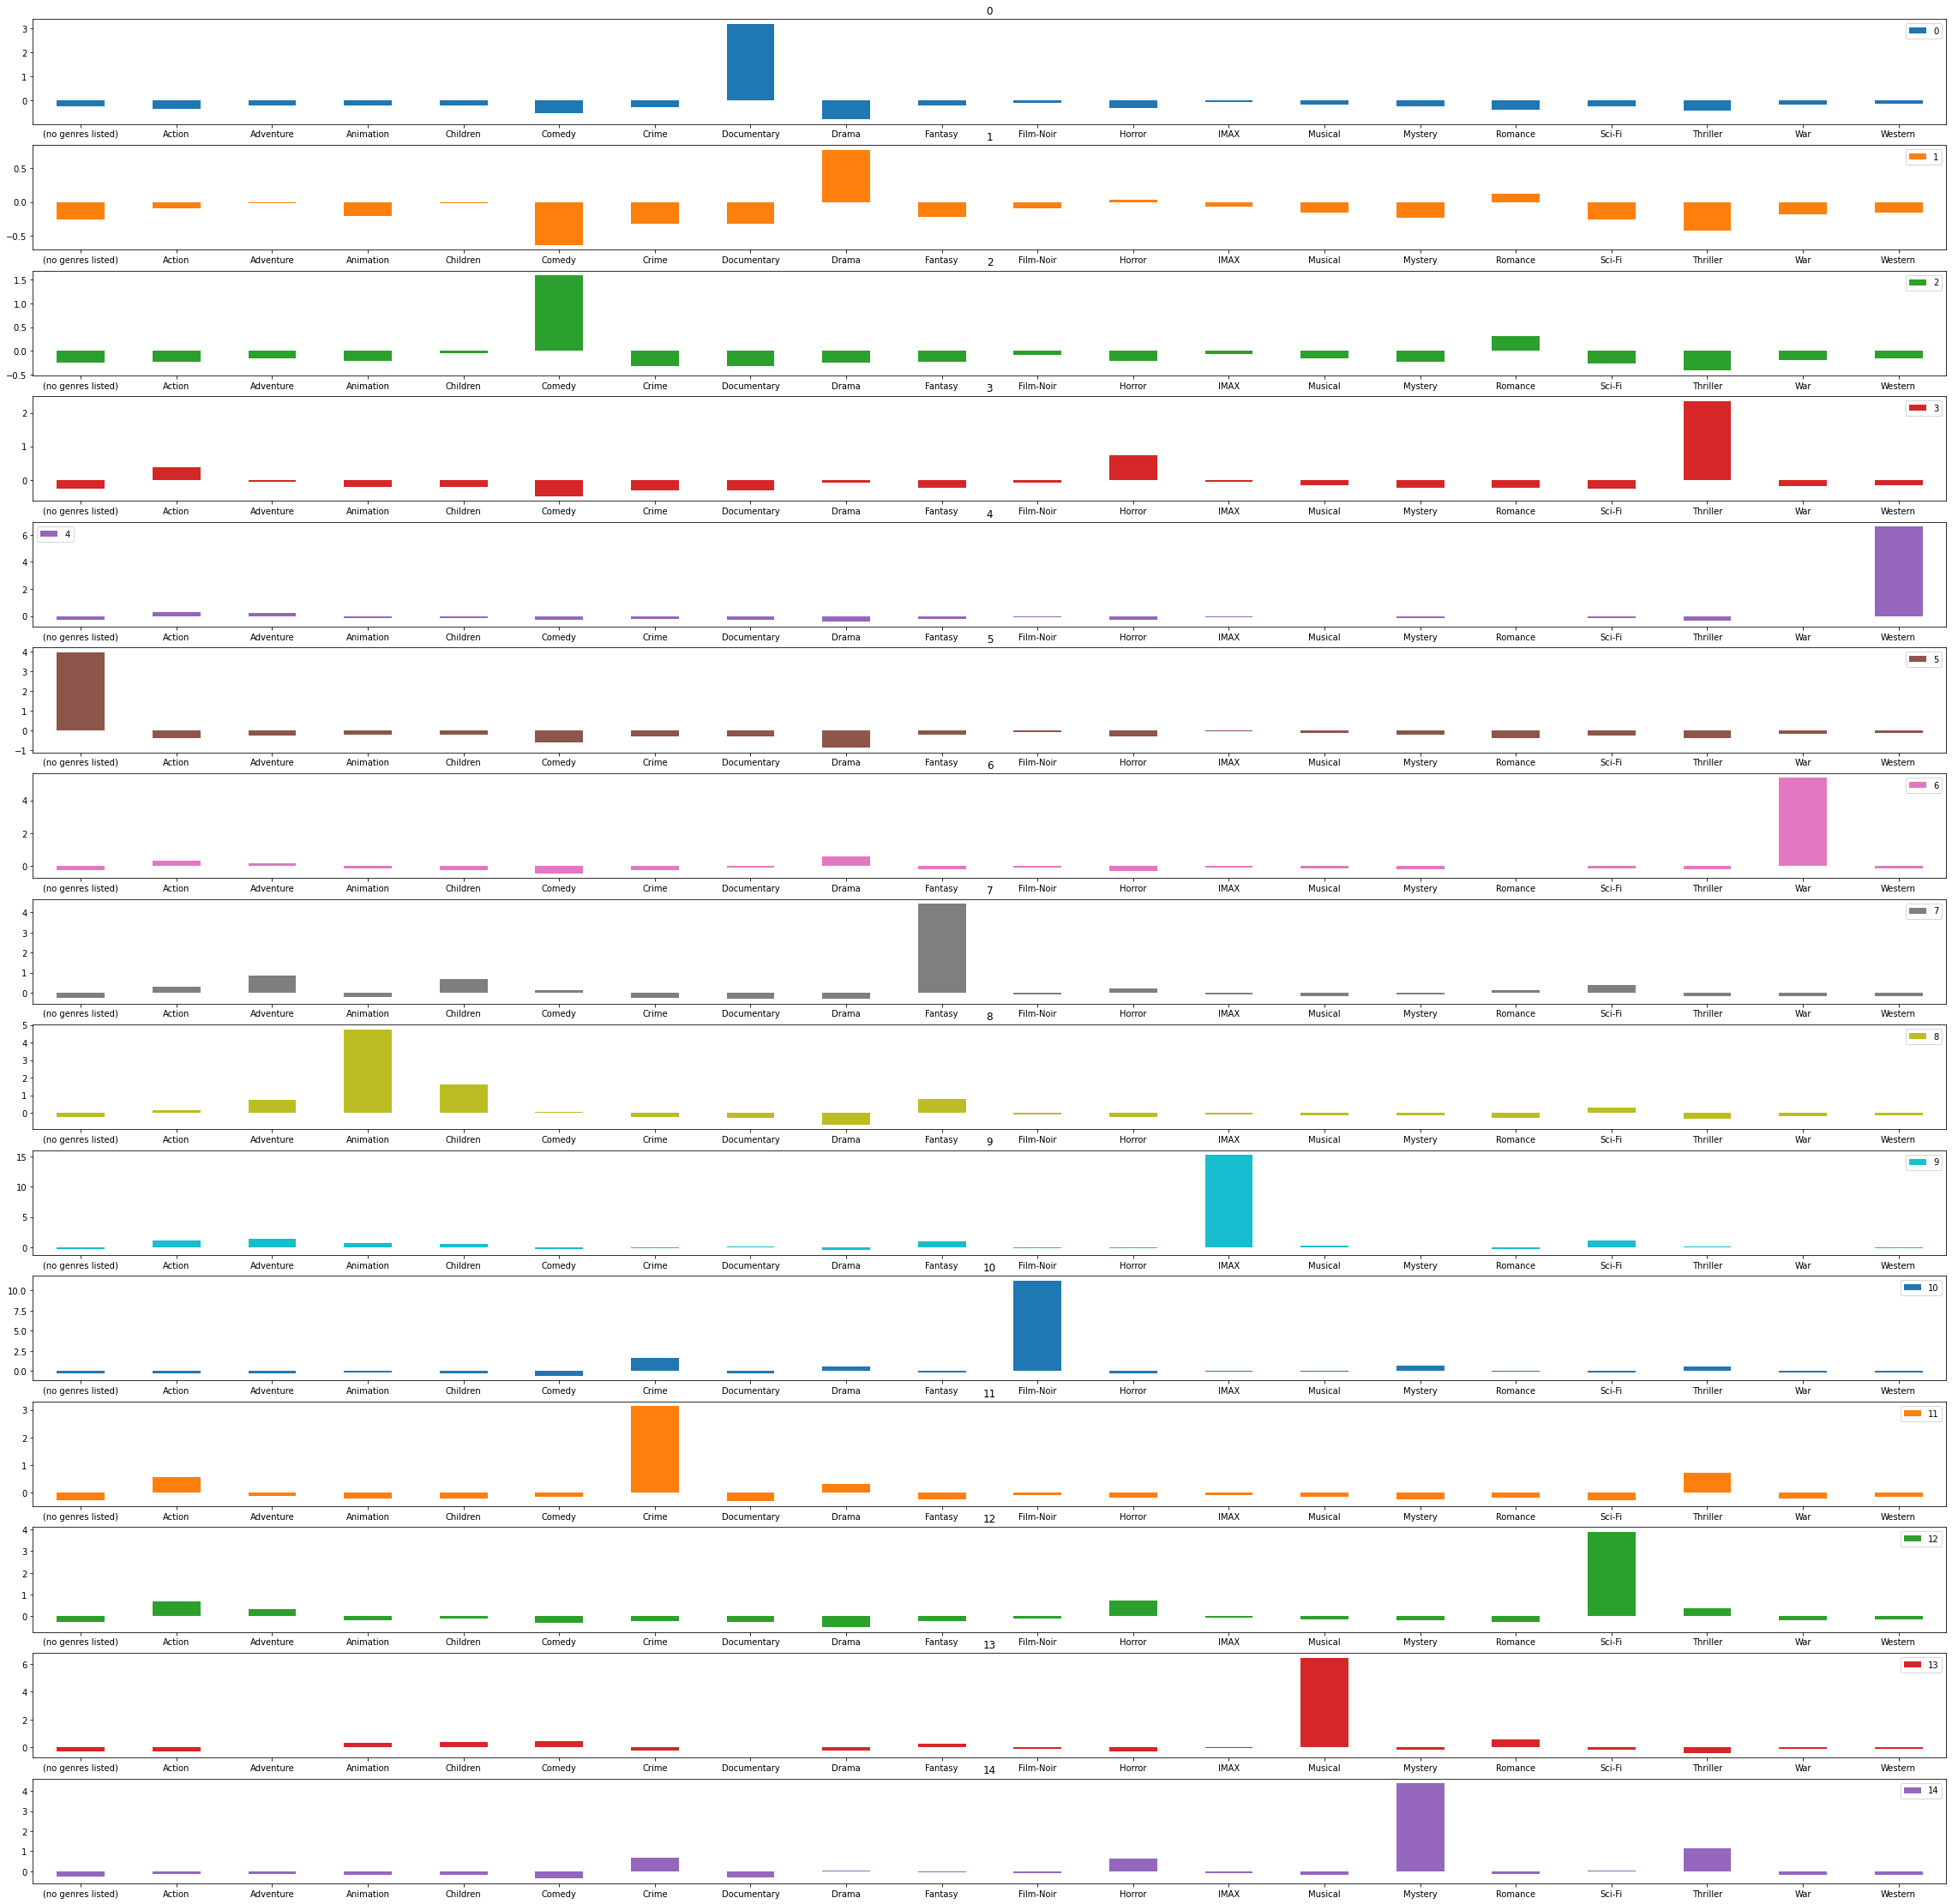

In [9]:
#visualizando os grupos de forma grafica
grupos.T.plot.bar(subplots=True, figsize = (40,40), sharex=False, rot=0)

In [10]:
#alguns filtros por grupros
grupo = 4

filtro = (modelo.labels_ == grupo)

base[filtro].sample(10)

,movieId,title,genres
37425,154037,And the Crows Will Dig Your Grave (1971),Western
2836,2921,High Plains Drifter (1973),Western
27646,125421,The Gundown (2011),Action|Western
13670,68069,Ride Lonesome (1959),Western
8698,26221,Dirty Dingus Magee (1970),Comedy|Western
27230,124162,The Wonderful Country (1959),Western
33654,143295,A Dollar Between the Teeth (1967),Western
3647,3737,Lonely Are the Brave (1962),Drama|Western
8728,26258,"Topo, El (1970)",Fantasy|Western
38721,157901,Apache Drums (1951),Action|Western


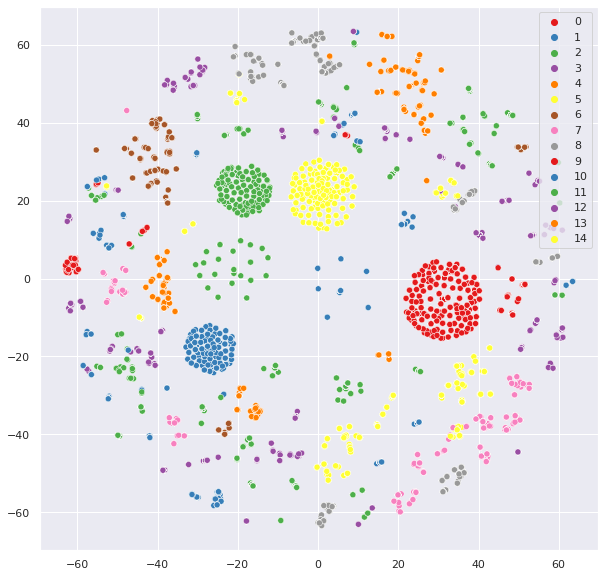

In [11]:
from sklearn.manifold import TSNE #o manifold auxilia em trasnformaçoes e visualizações para dados de multiplas dimensoes
import seaborn as sns #biblioteca grafica

tsne = TSNE()

visualiza = tsne.fit_transform(tipos_escalados) 

#criando um Scaterplot
sns.set(rc = {'figure.figsize': (10,10)})
sns.scatterplot(x=visualiza[:,0], y=visualiza[:,1], hue=modelo.labels_, palette=sns.color_palette('Set1', 15))

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'b',
  'b'],
 'dcoord': [[0.0, 2.4656806103302547, 2.4656806103302547, 0.0],
  [0.0, 3.0514885144222545, 3.0514885144222545, 2.4656806103302547],
  [0.0, 3.7735378700472477, 3.7735378700472477, 3.0514885144222545],
  [0.0, 3.89151499198021, 3.89151499198021, 3.7735378700472477],
  [0.0, 4.5633831671297616, 4.5633831671297616, 3.89151499198021],
  [0.0, 4.580200317073235, 4.580200317073235, 4.5633831671297616],
  [0.0, 4.911531739850827, 4.911531739850827, 4.580200317073235],
  [0.0, 5.040640874057214, 5.040640874057214, 4.911531739850827],
  [0.0, 5.595936578565117, 5.595936578565117, 5.040640874057214],
  [0.0, 5.66169304966064, 5.66169304966064, 5.595936578565117],
  [0.0, 6.769612859362334, 6.769612859362334, 5.66169304966064],
  [0.0, 6.897313209000044, 6.897313209000044, 6.769612859362334],
  [0.0, 11.50397434449856, 11.50397434449856, 6.897313209000044],
  [0.0, 15.637278650118725,

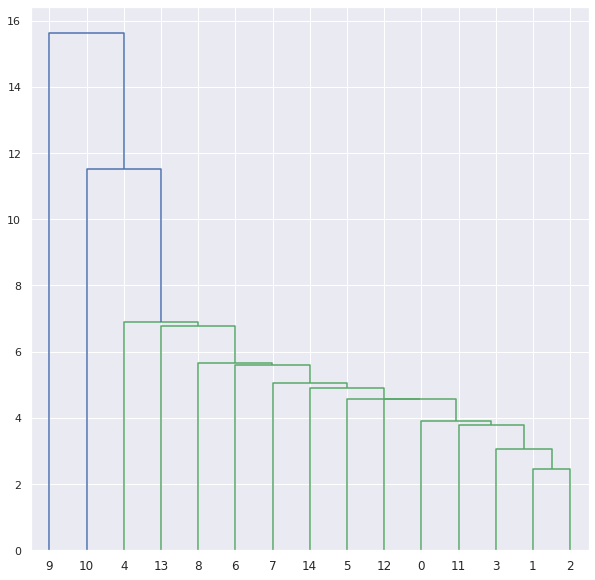

In [12]:
#dendograma
#essa visualização grafica monta um grafico de era semelhante a uma arvore
from scipy.cluster.hierarchy import dendrogram, linkage

matriz_de_distancias = linkage(grupos)

dendrogram(matriz_de_distancias)

##Metodo de Elbow
 - esse metodo pode nos indicar a quantidade de clusters certos
 - assim evitamos de escolher um numero arbitrario de clusters na criação do modelo

1 916860.0
2 854269.190147399
3 802986.4640237931
4 749579.6766154469
5 705685.5904874813
6 649414.1112318063
7 614355.9470379659
8 573706.1230305947
9 536268.1027732347
10 539563.5941953469
11 485860.267456116
12 455029.8374423092
13 413691.61580493924
14 408220.5649542404


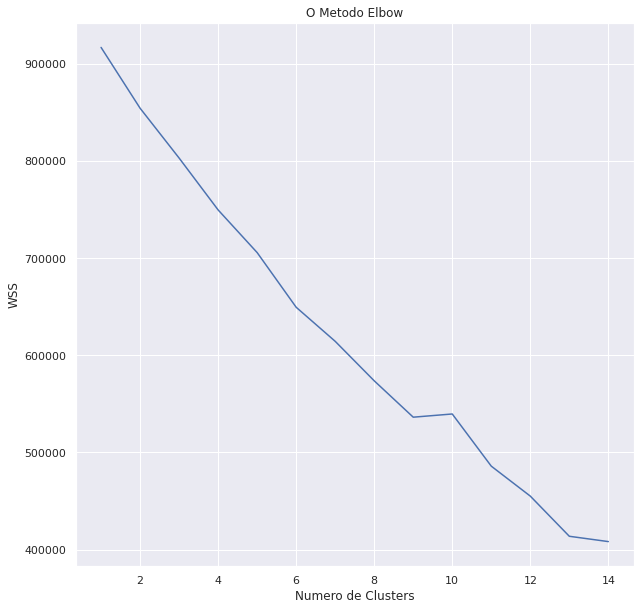

In [13]:
import matplotlib.pyplot as plt #bilbioteca grafica

#esse metodo testara a variancia entre o intervalo que atribuirmos
wcss = []

for i in range(1, 15):
    modelo = KMeans(n_clusters = i, init = 'random')
    modelo.fit(tipos_escalados)
    print (i,modelo.inertia_)
    wcss.append(modelo.inertia_)
#o valor inertia corresponde ao somatório dos erros quadráticos das instâncias de cada cluster

plt.plot(range(1, 15), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') 
plt.show() #é possivel analisar que a variancia acaba 10 clusters